<a href="https://colab.research.google.com/github/navgaur/Mathematical-Physics-II/blob/main/Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit - 5**
# **Numerical Integration**

**Newton Cotes Integration methods (Trapezoidal and Simpson rules) for definite integrals**

$$ \int_a^b f(x) dx $$


---

Divide the interval $[a,b]$ into n-subintervals and have $(n+1)$ points
$$ x_i = a + j h, ~~ h = \frac{(b - a)}{n}, ~~ i = 0,1,...,n$$

For the above mentioned discreate datapoints $(x_i,y_i)$ ($y_i = f(x_i)$) one can find out Lagrange interpolating polynomial of order $n$:
$$
g_n(x) = \sum_{k=0}^n L_k(x) f(x_k)
$$
The above interpolating polynomial ($g_n(x)$) is a good approximation of the original function $f(x)$ i.e.
$$ g_n(x) \approx f(x)$$

So the definite integration becomes:
$$
\int_a^b f(x) dx \approx \int_a^b g_n(x) dx = \sum_{k=0}^n f(x_k) \int_a^b L_k (x) dx = \sum_a^b f(x_k) w_k
$$

Above formula is called **Newton-Cotes formula** of order $n$ and now one needs to evaluate the weights ($w_k$).
$$ w_k = \int_a^b L_k (x) dx, ~~ k = 0,1,..n$$

##**Trapezoidal Rule**

Newton-Cotes formula for $n=1$ result in interpolating polynomial of order 1.

$$ \int_a^b f(x) dx \approx \frac{h}{2} (f_0 + f_1) $$

The same can be derived from Lagrange interpolation polynomial.
$$g_1(x) =
f_0 \frac{x - x_1}{x_0 - x_1} + f_1 \frac{x - x_0}{x_1 - x_0}
= f_0 \frac{x - x_1}{-h} + f_1 \frac{x - x_0}{h}
$$
with $x_0 = a$ and $x_1 = b$
$$ \int_{x_0}^{x_1} g_1(x) dx = - \frac{f_0}{h} \int_{x_0}^{x_1} (x - x_1) dx + \frac{f_1}{h} \int_{x_0}^{x_1} (x - x_0) dx
= \frac{h}{2} \left( f_0 + f_1 \right)   
$$

In [ ]:
def integrate_trapz(func,a,b,n):
  h = (b-a)/n
  tmp = 0.5 * (func(a) + func(b))
  for i in range(1,n):
    tmp += func(a+i*h)
  result = h*tmp
  return result

def integrand(x):
  return x**2

low_lim = 0
upp_lim = 2
n = 100

result = integrate_trapz(integrand,low_lim, upp_lim, n)

print(result)

2.6668000000000003


##**Simpsom (1/3) Rule**

Newton-Cotes formula for $n=2$ result in interpolating polynomial of order 2. The points are $a = x_0, x_1 = (b+a)/2, x_2 = b$ and $h=(b-a)/2$. In this case we have three weights $w_0, w_1, w_2$ given as

$$
w_0 = \int_{x_0}^{x_2} L_0(x) dx =
\int_{x_0}^{x_2} \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} dx
= \frac{1}{2 h^2} \int_{x_0}^{x_2} (x - x_1)(x - x_2) dx = \frac{h}{3}
$$

$$
w_1 = \int_{x_0}^{x_2} L_1(x) dx =
\int_{x_0}^{x_2} \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} dx
= \frac{- 1}{h^2} \int_{x_0}^{x_2} (x - x_0)(x - x_2) dx = \frac{4 h}{3}
$$

Similarly one can evaluate $w_2 = \frac{h}{3}$. Thus
$$
\int_a^b f(x) dx \approx \frac{h}{3} \left( f_0 + 4 f_1 + f_2 \right)
$$

In [ ]:
def integrate_simp1(func,a,b,n):
  h = (b-a)/n
  tmp = func(a) + func(b)
  for i in range(1,n,2):
    tmp += 4*func(a+i*h)
  for i in range(2,n-1,2):
    tmp += 2*func(a+i*h)
  result = h*tmp/3
  return result

def integrand(x):
  return x**2

low_lim = 0
upp_lim = 2
n = 10

result = integrate_simp1(integrand,low_lim, upp_lim, n)

print(result)

2.666666666666668


## **Integration using inbuilt function (quad)**

### Square wave

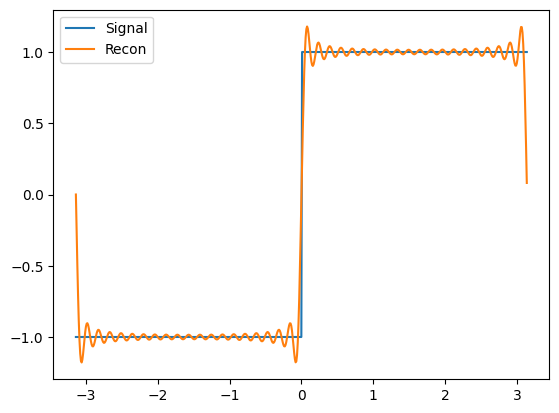

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import *

def sqre(x):
  if x < 0.0:
    return -1
  elif 0.0 <= x:
    return 1
  else:
    return 0

def fcos(x):
  return sqre(x)*cos(i*x)

def fsin(x):
  return sqre(x)*sin(i*x)

i=0
a0=quad(fcos,-np.pi,np.pi)[0]/(2*np.pi)

n=40
an,bn=[],[]
for i in range(1,n):
  a = quad(fcos,-np.pi,np.pi)[0]/(np.pi)
  b = quad(fsin,-np.pi,np.pi)[0]/(np.pi)
  an.append(a)
  bn.append(b)

xx=np.arange(-np.pi,np.pi,0.01)

y_recon=[]
for x in xx:
  sum=a0
  for i in range(1,n):
    sum += an[i-1]*cos(i*x) + bn[i-1]*sin(i*x)
  y_recon.append(sum)

y=[]
for i in xx:
  y.append(sqre(i))

plt.plot(xx,y,label='Signal' )
plt.plot(xx,y_recon,label="Recon")
plt.legend()
plt.show()




### **Legendre Polynomials orthogonality**

$$ \int_{-1}^1 P_n(x) P_m(x) = \frac{2}{2n + 1} \delta_{mn} $$

In [6]:
import numpy as np
from scipy.special import legendre
from scipy.integrate import quad

def di_legendre(m,n):
  return legendre(m)*legendre(n)

m,n=1,2
res=quad(di_legendre(m,n),-1,1)[0]
print(res)

0.0
